## Load the dataset

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df=pd.read_csv('data/NiV_Data.csv')
df.set_index('Year')

,Population,Urban Population %,Density (P/Km²),Urban Population,Rural Population,Max T,Min T,Rainfall,Precipitation,Humidity,Dry-Bulb T,Infected,Death
Year,,,,,,,,,,,,,
2001,136578600,23,1049,32505706,104072893,33.24,18.28,139.92,2198.861157,73.42,25.94,16,11
2002,138612896,24,1065,33960159,104652737,33.44,17.68,156.25,2127.613884,73.17,25.82,0,0
2003,140647193,25,1080,35443092,105204100,33.52,18.08,141.08,2159.296860,73.67,25.75,15,10
2004,142681489,25,1096,36954505,105726983,33.55,18.02,195.58,2112.044628,72.67,25.88,65,48
2005,144715786,26,1112,38494399,106221386,33.67,18.73,219.75,2092.132562,72.83,26.24,17,16
2006,146213025,27,1123,40033126,106179898,34.62,18.65,159.92,2205.117025,71.42,26.47,0,0
2007,147710264,28,1134,41595210,106115053,33.90,18.29,240.42,2246.405950,73.17,25.71,18,9
2008,149207503,28,1146,43180651,106026851,33.67,18.34,184.75,2384.648926,73.42,25.88,11,7
2009,150704742,29,1157,44789449,105915292,34.66,18.68,160.92,2155.826777,70.25,26.52,7,2


In [4]:
# Calculate the mean and variance of the 'Infected' column to check for overdispersion
mean_infected = df['Infected'].mean()
variance_infected = df['Infected'].var()

print("Mean of Infected: {:.2f}\nVariance of Infected: {:.2f}".format(mean_infected, variance_infected))

# Calculate the mean and variance of the 'Deaths' column to check for overdispersion
mean_deaths = df['Death'].mean()
variance_deaths = df['Death'].var()

print("\nMean of Deaths: {:.2f}\nVariance of Deaths: {:.2f}".format(mean_deaths, variance_deaths))

Mean of Infected: 14.83
Variance of Infected: 245.45

Mean of Deaths: 10.46
Variance of Deaths: 141.82


## Poisson and Negative Binomial Model

In [5]:
import statsmodels.formula.api as smf

# Renaming the columns to avoid spaces and special characters
df.rename(columns={
    'Max T': 'Max_T',
    'Min T': 'Min_T',
    'Density (P/Km²)': 'Density_P_Km',
    'Urban Population %': 'Urban_Population_Percent'
}, inplace=True)

# Define the formula for the model
formula = 'Infected ~ Max_T + Min_T + log_Density + Urban_Population_Percent'

# Create a new column 'log_Density' in the dataframe
df['log_Density'] = np.log(df['Density_P_Km'])

# Fit the Poisson model
poisson_model = smf.poisson(formula=formula, data=df).fit()

# Fit the Negative Binomial model
nb_model = smf.negativebinomial(formula=formula, data=df).fit()

# Compare the models using AIC
poisson_aic = poisson_model.aic
nb_aic = nb_model.aic

poisson_aic, nb_aic, poisson_model.summary(), nb_model.summary()

# Fit the Negative Binomial model
nb_model = smf.negativebinomial(formula=formula, data=df).fit()

# Compare the models using AIC
poisson_aic = poisson_model.aic
nb_aic = nb_model.aic

poisson_aic, nb_aic, poisson_model.summary(), nb_model.summary()


Optimization terminated successfully.
         Current function value: 6.828874
         Iterations 8
         Current function value: 3.569956
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43
         Current function value: 3.569956
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43


/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(337.78593754082624,
 183.35787301341907,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                           Poisson Regression Results                          
 Dep. Variable:               Infected   No. Observations:                   24
 Model:                        Poisson   Df Residuals:                       19
 Method:                           MLE   Df Model:                            4
 Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.2373
 Time:                        00:25:19   Log-Likelihood:                -163.89
 converged:                       True   LL-Null:                       -214.89
 Covariance Type:            nonrobust   LLR p-value:                 3.685e-21
                                coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------------
 Intercept                 -265.5670     47.751     -5.562      0.000    -359.15

# Diagnostic plots for Poisson and Negative Binomial models

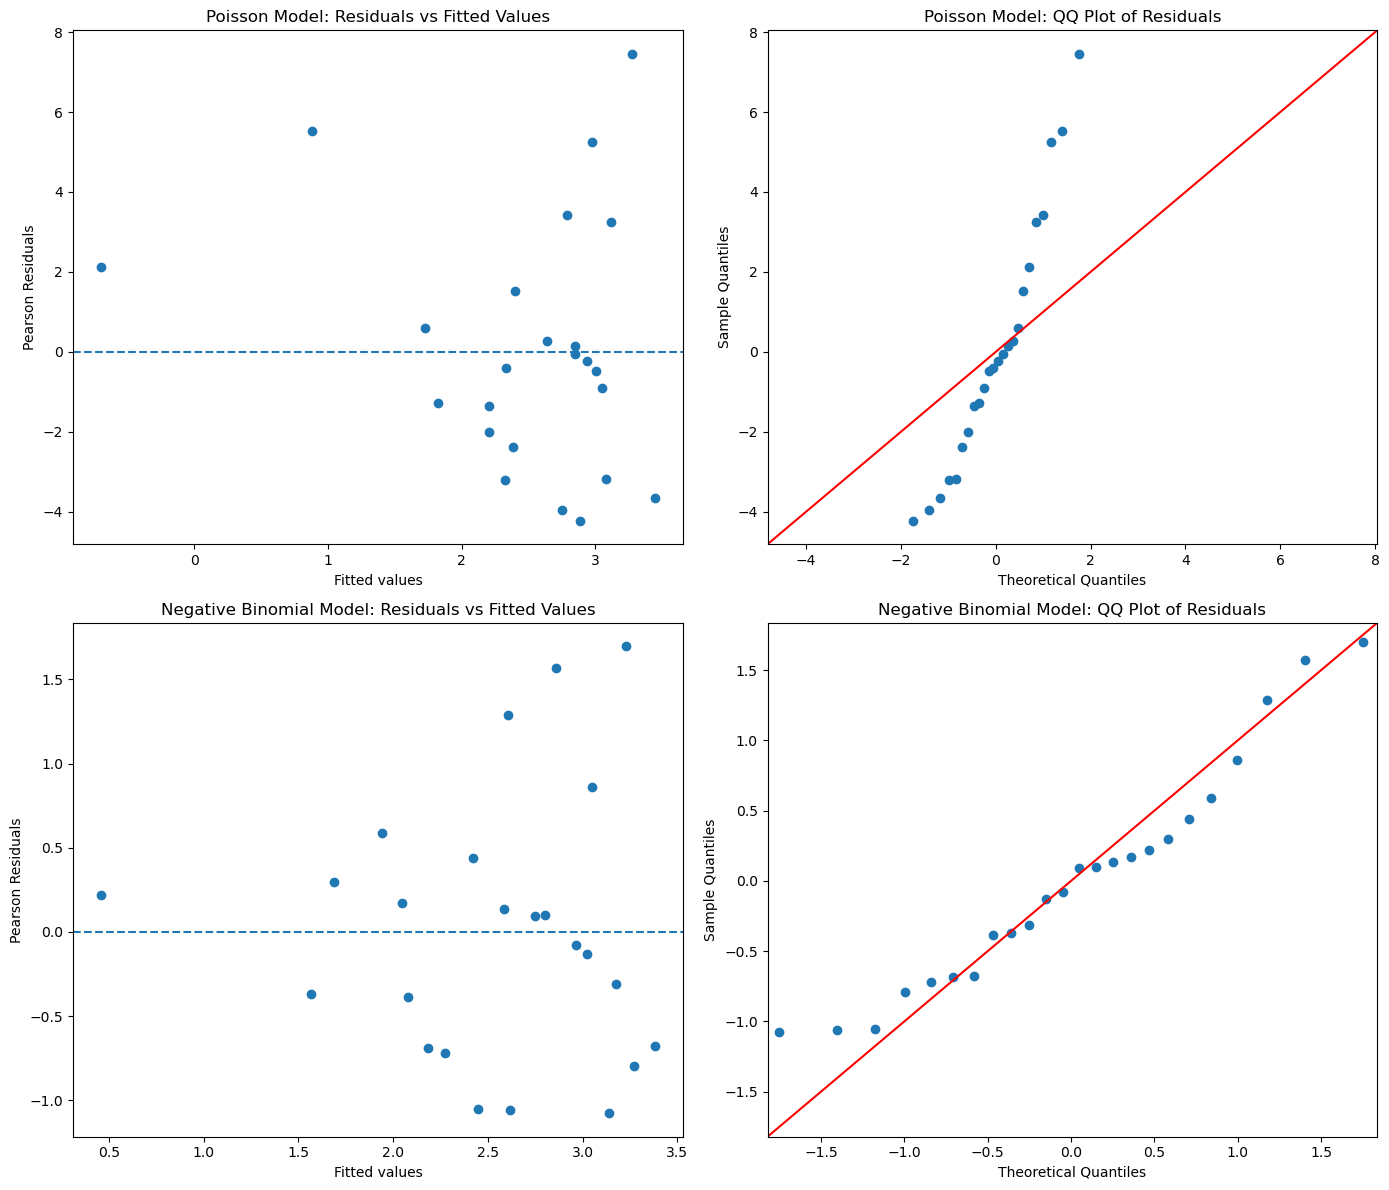

In [6]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create diagnostic plots for the Poisson model

fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Residuals vs Fitted Values plot for Poisson model
axs[0, 0].scatter(poisson_model.fittedvalues, poisson_model.resid_pearson)
axs[0, 0].axhline(y=0, linestyle='--')
axs[0, 0].set_xlabel('Fitted values')
axs[0, 0].set_ylabel('Pearson Residuals')
axs[0, 0].set_title('Poisson Model: Residuals vs Fitted Values')

# QQ plot for the Poisson model residuals
sm.qqplot(poisson_model.resid_pearson, line='45', ax=axs[0, 1])
axs[0, 1].set_title('Poisson Model: QQ Plot of Residuals')

# Residuals vs Fitted Values for the Negative Binomial model
axs[1, 0].scatter(nb_model.fittedvalues, nb_model.resid_pearson)
axs[1, 0].axhline(y=0, linestyle='--')
axs[1, 0].set_xlabel('Fitted values')
axs[1, 0].set_ylabel('Pearson Residuals')
axs[1, 0].set_title('Negative Binomial Model: Residuals vs Fitted Values')

# QQ plot for the Negative Binomial model residuals
sm.qqplot(nb_model.resid_pearson, line='45', ax=axs[1, 1])
axs[1, 1].set_title('Negative Binomial Model: QQ Plot of Residuals')

plt.tight_layout()
plt.show()


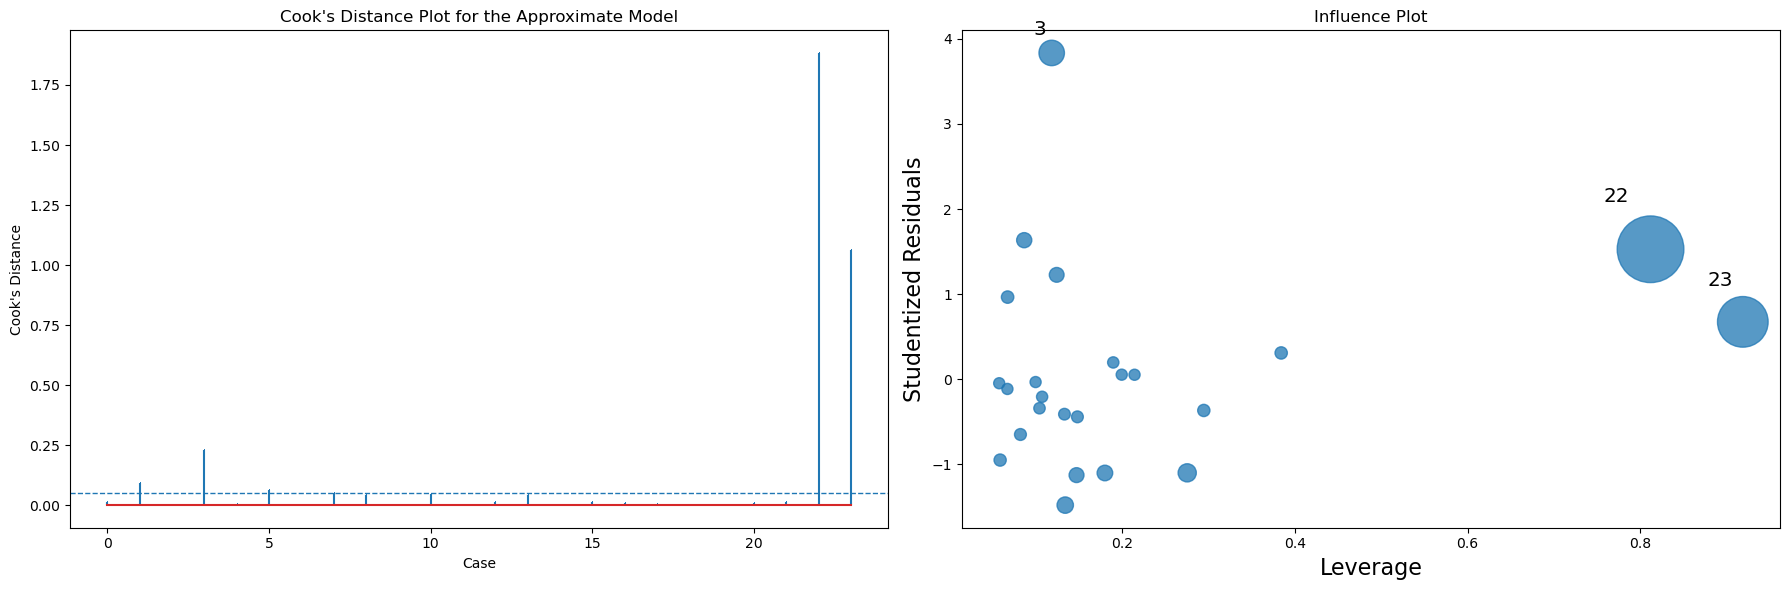

In [7]:
# Calculating Cook's distance manually for the Negative Binomial model
from statsmodels.stats.outliers_influence import OLSInfluence

# Influence Plot for the OLS model
from statsmodels.graphics.regressionplots import influence_plot

# Influence measures for calculating Cook's Distance based on the OLS model framework
ols_model = smf.ols(formula=formula, data=df).fit()

# Calculating Cook's Distance using OLS model
influence_ols = OLSInfluence(ols_model)
cooks_d = influence_ols.cooks_distance[0]

# Extract various diagnostic measures
leverage = influence_ols.hat_matrix_diag  # Leverage values (hat values)
dffits = influence_ols.dffits[0]  # DFFITS values
dfbetas = influence_ols.dfbetas  # DFBETAS values for each coefficient
studentized_residuals = influence_ols.resid_studentized_external  # Studentized residuals

# Create a summary DataFrame to organize the diagnostics
influence_df = pd.DataFrame({
    'Leverage': leverage,
    'Cooks_D': cooks_d,
    'DFFITS': dffits,
    'Studentized_Residuals': studentized_residuals
})

# Add DFBETAS for each coefficient
for i, col in enumerate(ols_model.params.index):
    influence_df[f'DFBETAS_{col}'] = dfbetas[:, i]

# Display the top 10 most influential points based on Cook's Distance
influence_df_sorted = influence_df.sort_values(by='Cooks_D', ascending=False).head(10)

# Display the DataFrame with the diagnostic measures without indexing
influence_df_sorted.reset_index(drop=True, inplace=True)
influence_df_sorted

# Create a 1x2 subplot for the Cook's Distance plot and the influence plot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot Cook's Distance
axs[0].stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
axs[0].axhline(y=0.05, linestyle='--', linewidth=1)
axs[0].set_xlabel('Case')
axs[0].set_ylabel("Cook's Distance")
axs[0].set_title("Cook's Distance Plot for the Approximate Model")

# Create the influence plot
influence_plot(ols_model, ax=axs[1])
axs[1].set_title("Influence Plot")

plt.tight_layout()
plt.show()


# Remove influential points

In [8]:
# Define a threshold for Cook's Distance (e.g., 0.05)
influential_threshold = 0.05

# Identify rows with Cook's Distance greater than the threshold
influential_points = influence_df[influence_df['Cooks_D'] > influential_threshold].index

# Remove influential points from the dataset
data_cleaned_no_influential = df.drop(index=influential_points)

# Refit the Negative Binomial model without the influential points
nb_model_no_influential = smf.negativebinomial(formula=formula, data=data_cleaned_no_influential).fit()

# Compare the new model to the original model
print(nb_model_no_influential.summary())

         Current function value: 3.179584
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 45
                     NegativeBinomial Regression Results                      
Dep. Variable:               Infected   No. Observations:                   18
Model:               NegativeBinomial   Df Residuals:                       13
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1406
Time:                        00:25:21   Log-Likelihood:                -57.233
converged:                      False   LL-Null:                       -66.595
Covariance Type:            nonrobust   LLR p-value:                 0.0008897
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -364.3631    101.952  

/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
# Removing the most influential points (based on Cook's Distance) from the dataset
influential_points = influence_df_sorted.index

# Create a new dataset without the influential points
data_cleaned = df.drop(influential_points)

# Refit the Negative Binomial model on the cleaned dataset
nb_model_cleaned = smf.negativebinomial(formula=formula, data=data_cleaned).fit()

# Compare the AIC of the cleaned model to the original model
nb_aic_cleaned = nb_model_cleaned.aic
nb_aic_original = nb_model.aic

print("Original Model AIC:", nb_aic)
print("Cleaned Model AIC:", nb_aic_cleaned)

# Summary
nb_model_cleaned.summary()

         Current function value: 3.173911
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
Original Model AIC: 183.35787301341907
Cleaned Model AIC: 100.86950771339036


/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                     NegativeBinomial Regression Results                      
==============================================================================
Dep. Variable:               Infected   No. Observations:                   14
Model:               NegativeBinomial   Df Residuals:                        9
Method:                           MLE   Df Model:                            4
Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1277
Time:                        00:25:21   Log-Likelihood:                -44.435
converged:                      False   LL-Null:                       -50.941
Covariance Type:            nonrobust   LLR p-value:                   0.01122
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  -36.9074    370.227     -0.100      0.921    -762.539     688.724
Max_T                        0.3125      0.173      1.804      0.071      -0.027       0.652
Min_T                        0.0286      0.180      0.158      0.874      -0.325       0.382
log_Density                  5.6341     55.223      0.102      0.919    -102.602     113.870
Urban_Population_Percent    -0.3403      0.561     -0.607      0.544      -1.439       0.758
alpha                        0.3217      0.181      1.773      0.076      -0.034       0.677
============================================================================================
"""

# Correlation Analysis

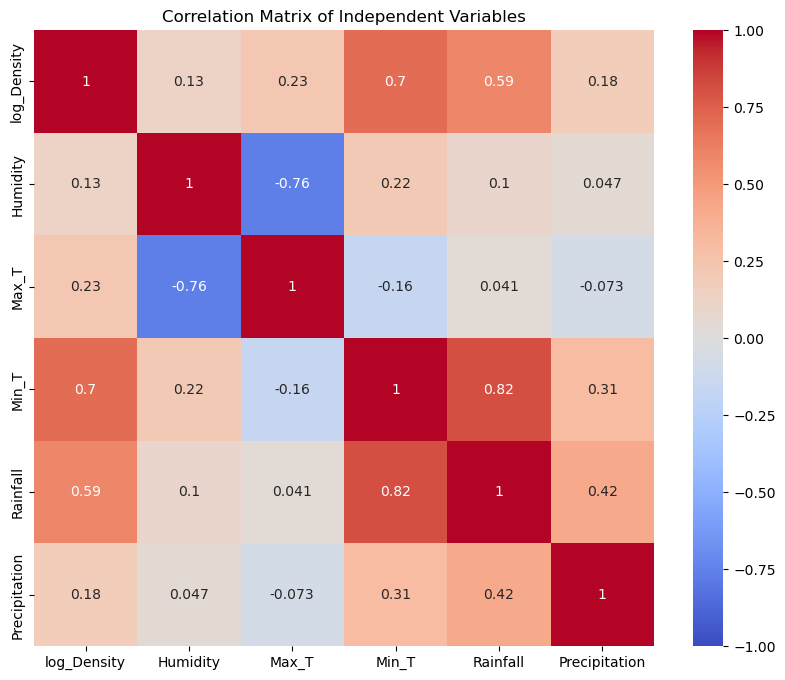

In [10]:
# Let's calculate the correlation matrix for the independent variables to check for multicollinearity
corr_matrix = data_cleaned[['log_Density', 'Humidity', 'Max_T', 'Min_T', 'Rainfall', 'Precipitation']].corr()

# Display the correlation matrix
corr_matrix

# Create a heatmap of the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

# Check for multicollinearity

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a new dataframe with the relevant independent variables
X = data_cleaned[['log_Density', 'Humidity', 'Max_T', 'Min_T', 'Rainfall', 'Precipitation']]

# Adding a constant for the intercept
X = sm.add_constant(X)

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
# Higher VIF values indicate multicollinearity
vif_data

,Variable,VIF
0,const,93580.774175
1,log_Density,4.010494
2,Humidity,3.999115
3,Max_T,5.564071
4,Min_T,6.578901
5,Rainfall,4.048606
6,Precipitation,1.258123


In [12]:
# Calculate Pseudo R-squared, AIC, and Log-Likelihood for the Negative Binomial model
pseudo_r_squared = 1 - (nb_model_cleaned.llf / nb_model_cleaned.llnull)  # Pseudo R-squared formula
aic_value = nb_model_cleaned.aic  # AIC
log_likelihood = nb_model_cleaned.llf  # Log-Likelihood

# Create a summary of the model's accuracy
model_accuracy = {
    "Pseudo R-squared": pseudo_r_squared,
    "AIC": aic_value,
    "Log-Likelihood": log_likelihood
}

# Display the model's accuracy summary as a DataFrame
model_accuracy_df = pd.DataFrame(model_accuracy, index=['Values'])
model_accuracy_df

,Pseudo R-squared,AIC,Log-Likelihood
Values,0.127715,100.869508,-44.434754


# Cross Validation

In [13]:
from sklearn.model_selection import KFold
from sklearn.metrics import root_mean_squared_error

# Define the features (X) and target (y)
X = data_cleaned[['log_Density', 'Humidity', 'Max_T', 'Min_T', 'Rainfall', 'Precipitation']]
y = data_cleaned['Infected']

# Add constant for intercept
X = sm.add_constant(X)

# Set up K-fold cross-validation (we'll use 5 folds)
kf = KFold(n_splits=5, shuffle=True, random_state=1)
mse_list = []

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the model on the training data
    model_cv = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()
    
    # Predict on the test data
    y_pred = model_cv.predict(X_test)
    
    # Calculate mean squared error for this fold
    mse = root_mean_squared_error(y_test, y_pred)
    mse_list.append(mse**2)

# Calculate the average MSE across all folds
avg_mse = np.mean(mse_list)

avg_mse

/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha 

735.9189566018285

# Simplify the model

In [14]:
# Simplifying the model by removing 'Precipitation' and 'Min_T' (keeping 'Max_T')
formula_simplified = "Infected ~ log_Density + Humidity + Max_T + Rainfall"

# Fit the Negative Binomial model on the simplified formula
nb_model_simplified = smf.negativebinomial(formula=formula_simplified, data=data_cleaned).fit()

# Perform cross-validation on the simplified model
mse_list_simplified = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Fit the simplified model on the training data
    model_cv_simplified = sm.GLM(y_train, X_train[['const', 'log_Density', 'Humidity', 'Max_T', 'Rainfall']], family=sm.families.NegativeBinomial()).fit()
    
    # Predict on the test data
    y_pred_simplified = model_cv_simplified.predict(X_test[['const', 'log_Density', 'Humidity', 'Max_T', 'Rainfall']])
    
    # Calculate mean squared error for this fold
    mse_simplified = root_mean_squared_error(y_test, y_pred_simplified)
    mse_list_simplified.append(mse_simplified ** 2)

# Calculate the average MSE across all folds for the simplified model
avg_mse_simplified = np.mean(mse_list_simplified)

# Return the AIC and cross-validation MSE for the simplified model
nb_aic_simplified = nb_model_simplified.aic

avg_mse_simplified, nb_aic_simplified, nb_model_simplified.summary()

         Current function value: 3.103505
         Iterations: 35
         Function evaluations: 45
         Gradient evaluations: 45


/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value 

(85.62785756107314,
 98.8981312579791,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                      NegativeBinomial Regression Results                      
 Dep. Variable:               Infected   No. Observations:                   14
 Model:               NegativeBinomial   Df Residuals:                        9
 Method:                           MLE   Df Model:                            4
 Date:                Mon, 21 Oct 2024   Pseudo R-squ.:                  0.1471
 Time:                        00:25:21   Log-Likelihood:                -43.449
 converged:                      False   LL-Null:                       -50.941
 Covariance Type:            nonrobust   LLR p-value:                  0.004736
                   coef    std err          z      P>|z|      [0.025      0.975]
 -------------------------------------------------------------------------------
 Intercept     160.0102     42.777      3.741      0.000      76.170     243.851
 log_Density   -19.9856     

In [15]:
# Calculate AIC, BIC for both the full and simplified models

# AIC for the full model
aic_full = nb_model_cleaned.aic

# BIC for the full model
bic_full = nb_model_cleaned.bic

# AIC for the simplified model
aic_simplified = nb_model_simplified.aic

# BIC for the simplified model
bic_simplified = nb_model_simplified.bic

# Create a summary DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Full Model', 'Simplified Model'],
    'AIC': [aic_full, aic_simplified],
    'BIC': [bic_full, bic_simplified]
})

model_comparison

,Model,AIC,BIC
0,Full Model,100.869508,104.703852
1,Simplified Model,98.898131,102.732475


In [16]:
# Calculate the absolute differences between AIC and BIC for both models
aic_difference = abs(nb_aic_simplified - nb_aic_cleaned)
bic_difference = abs(bic_simplified - bic_full)

aic_difference, bic_difference

(1.97137645541126, 1.97137645541126)

/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 3.569956
         Iterations: 35
         Function evaluations: 43
         Gradient evaluations: 43


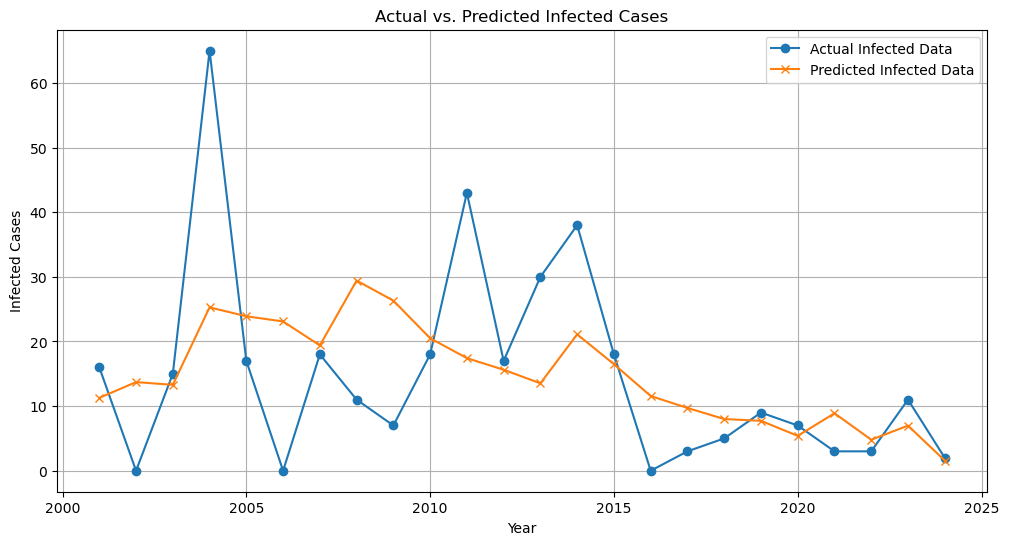

In [17]:
# Plot values of infected data
# Fit the Negative Binomial model on the infected data

# Define the formula for the model
formula_infected = 'Infected ~ Max_T + Min_T + log_Density + Urban_Population_Percent'

# Fit the Negative Binomial model
nb_model_infected = smf.negativebinomial(formula=formula_infected, data=df).fit()

# Predict the values of the infected data
infected_pred = nb_model_infected.predict(df)

# Plot the actual and predicted values of the infected data
plt.figure(figsize=(12, 6))
plt.plot(df['Year'], df['Infected'], label='Actual Infected Data', marker='o')
plt.plot(df['Year'], infected_pred, label='Predicted Infected Data', marker='x')
plt.xlabel('Year')
plt.ylabel('Infected Cases')
plt.title('Actual vs. Predicted Infected Cases')
plt.legend()
plt.grid(True)
plt.show()

# Switch to a 2nd order polynomial model

In [18]:
# Creating polynomial features (degree 2) for the predictors in the full model
from sklearn.preprocessing import PolynomialFeatures

# Define the independent variables from the cleaned data
X_poly = data_cleaned[['log_Density', 'Humidity', 'Max_T', 'Min_T', 'Rainfall', 'Precipitation']]

# Add polynomial features (degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_transformed = poly.fit_transform(X_poly)

# Fit the Negative Binomial model using polynomial features
nb_poly_model = sm.GLM(data_cleaned['Infected'], X_poly_transformed, family=sm.families.NegativeBinomial()).fit()

# Return the summary of the polynomial model
nb_poly_model.summary()

/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/home/abhowmik/miniconda3/envs/pyenv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Infected   No. Observations:                   14
Model:                            GLM   Df Residuals:                        0
Model Family:        NegativeBinomial   Df Model:                           13
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42.689
Date:                Mon, 21 Oct 2024   Deviance:                   3.7658e-09
Time:                        00:25:22   Pearson chi2:                 1.88e-09
No. Iterations:                    22   Pseudo R-squ. (CS):             0.6925
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0059      3.235      0.002      0.999      -6.335       6.346
x2             0.0022      1.012      0.002      0.998      -1.982       1.986
x3             0.0318     17.326      0.002      0.999     -33.927      33.991
x4             0.0009      0.309      0.003      0.998      -0.604       0.606
x5            -0.3999    256.489     -0.002      0.999    -503.108     502.309
x6             0.2075     80.086      0.003      0.998    -156.758     157.173
x7             0.0318     18.305      0.002      0.999     -35.846      35.909
x8            -0.0460     31.874     -0.001      0.999     -62.519      62.426
x9             0.1804    102.045      0.002      0.999    -199.823     200.184
x10           -0.0095      8.909     -0.001      0.999     -17.471      17.452
x11           -2.5010   1569.036     -0.002      0.999   -3077.755    3072.753
x12            0.1461     99.856      0.001      0.999    -195.567     195.860
x13            0.0251     74.765      0.000      1.000    -146.512     146.562
x14           -0.3889    292.393     -0.001      0.999    -573.469     572.692
x15           -1.0010    653.138     -0.002      0.999   -1281.128    1279.126
x16            0.1733    120.845      0.001      0.999    -236.680     237.026
x17            0.0004      3.675      0.000      1.000      -7.203       7.204
x18            1.2641    718.334      0.002      0.999   -1406.644    1409.173
x19            0.1214     63.051      0.002      0.998    -123.456     123.698
x20            0.1976    109.408      0.002      0.999    -214.237     214.632
x21           -0.0413     20.926     -0.002      0.998     -41.055      40.973
x22           -0.6041    391.842     -0.002      0.999    -768.601     767.393
x23            0.0726     29.192      0.002      0.998     -57.143      57.289
x24            0.0376     26.541      0.001      0.999     -51.981      52.056
x25           -0.0033      2.000     -0.002      0.999      -3.922       3.916
x26           -0.0006      0.380     -0.001      0.999      -0.745       0.744
x27           -0.0001      0.058     -0.002      0.998      -0.114       0.114
==============================================================================
"""

# Ridge Regularization

In [19]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# First, we scale the features to ensure the regularization works correctly
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_transformed)

# Fit a Ridge regression model with Negative Binomial distribution using GLM
# Note: Ridge regularization is typically handled in the context of linear models, and we will use it here for the transformed polynomial terms.
# statsmodels doesn't support regularization directly for GLM Negative Binomial, so we need to simulate the regularization with Ridge-like models.

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly_scaled, data_cleaned['Infected'])

# Output the coefficients and model performance (R^2 as a proxy for performance here) as a correlation matrix
coefficients = ridge_model.coef_
performance = ridge_model.score(X_poly_scaled, data_cleaned['Infected'])

coefficients, performance

(array([-3.86908633, -1.33060003, -0.29167468, -0.29063257,  0.32258805,
        -0.23981202, -3.78501705, -1.72288957, -0.7630883 , -0.38097362,
         0.31802741, -0.68713754, -1.07443404, -2.25539363, -0.28652381,
         0.42627561, -0.83143138, -0.14093979, -0.67013077,  0.05989687,
        -0.86025557,  0.77352616,  1.72016921,  0.01754565, -0.40979367,
        -0.01908587,  1.27493144]),
 0.6639930201896812)

# Lasso Regularization

In [20]:
from sklearn.linear_model import Lasso

# Fit a Lasso regression model with L1 regularization
# Lasso regression tends to shrink some coefficients to zero, effectively performing variable selection
lasso_model = Lasso(alpha=0.01, max_iter=10000)
lasso_model.fit(X_poly_scaled, data_cleaned['Infected'])

# Output the coefficients and model performance (R^2)
coefficients_lasso = lasso_model.coef_
performance_lasso = lasso_model.score(X_poly_scaled, data_cleaned['Infected'])

coefficients_lasso, performance_lasso

(array([ -7.7743958 ,  -8.51271362,   0.        , -60.01169536,
        -18.84232761, -96.20573393,  -0.86662484,  -0.        ,
          0.        ,  -0.        ,  -0.        ,  -0.        ,
         24.1661929 , -19.54834789,   0.        ,  -0.        ,
         14.40867212,  60.82574943,  -0.        ,  -0.        ,
        -60.53085044,  43.22185038, 119.49977007,   0.        ,
        -87.57108234,  -0.        , 136.56190957]),
 0.9080392088986645)

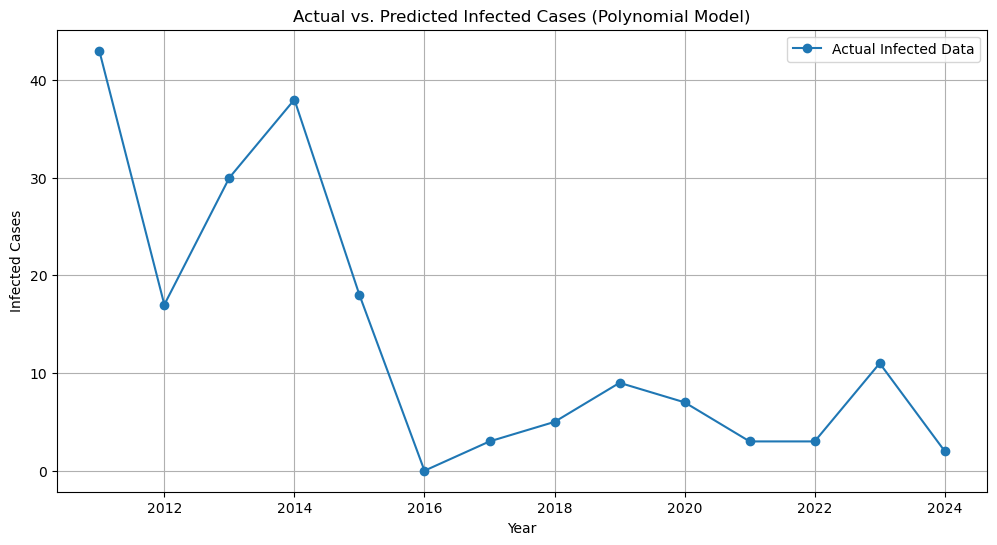

In [21]:
# Plot the infected data with the predicted values from the polynomial model
infected_poly_pred = nb_poly_model.predict(X_poly_transformed)

plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Year'], data_cleaned['Infected'], label='Actual Infected Data', marker='o')
# plt.plot(data_cleaned['Year'], infected_poly_pred, label='Predicted Infected Data (Polynomial)', marker='x')
plt.xlabel('Year')
plt.ylabel('Infected Cases')
plt.title('Actual vs. Predicted Infected Cases (Polynomial Model)')
plt.legend()
plt.grid(True)
plt.show()

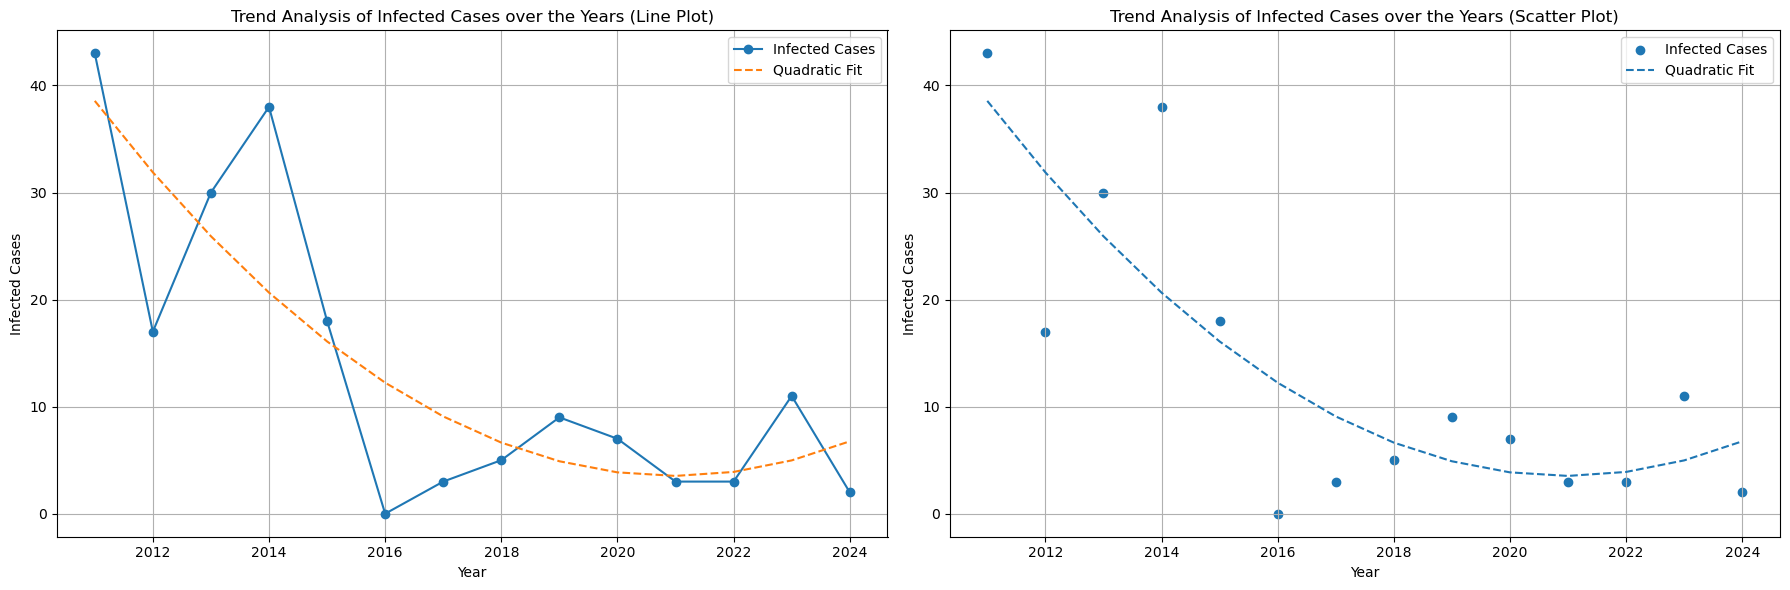

In [22]:
# Let's perform a trend analysis of infections over the years and plot the quadratic fit.

# First, we need to extract the year and infected columns
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')  # Ensure the year column is in the correct datetime format

# Extract the relevant columns
years = data_cleaned['Year'].dt.year
infected = data_cleaned['Infected']

# Fit a quadratic model to capture the trend over the years
poly_fit = np.polyfit(years, infected, 2)
poly_func = np.poly1d(poly_fit)

# Generate the trend line based on the quadratic fit
years_sorted = np.sort(years)
trend_line = poly_func(years_sorted)

# Create a 1x2 subplot for the line plot and scatter plot with quadratic fit
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Plot the infected data as line and the quadratic fit on the first subplot
axs[0].plot(years, infected, label='Infected Cases', marker='o')
axs[0].plot(years_sorted, trend_line, label='Quadratic Fit', linestyle='--')
axs[0].set_title('Trend Analysis of Infected Cases over the Years (Line Plot)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Infected Cases')
axs[0].legend()
axs[0].grid(True)

# Plot the infected data as scatter points and the quadratic fit on the second subplot
axs[1].scatter(years, infected, label='Infected Cases')
axs[1].plot(years_sorted, trend_line, label='Quadratic Fit', linestyle='--')
axs[1].set_title('Trend Analysis of Infected Cases over the Years (Scatter Plot)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Infected Cases')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

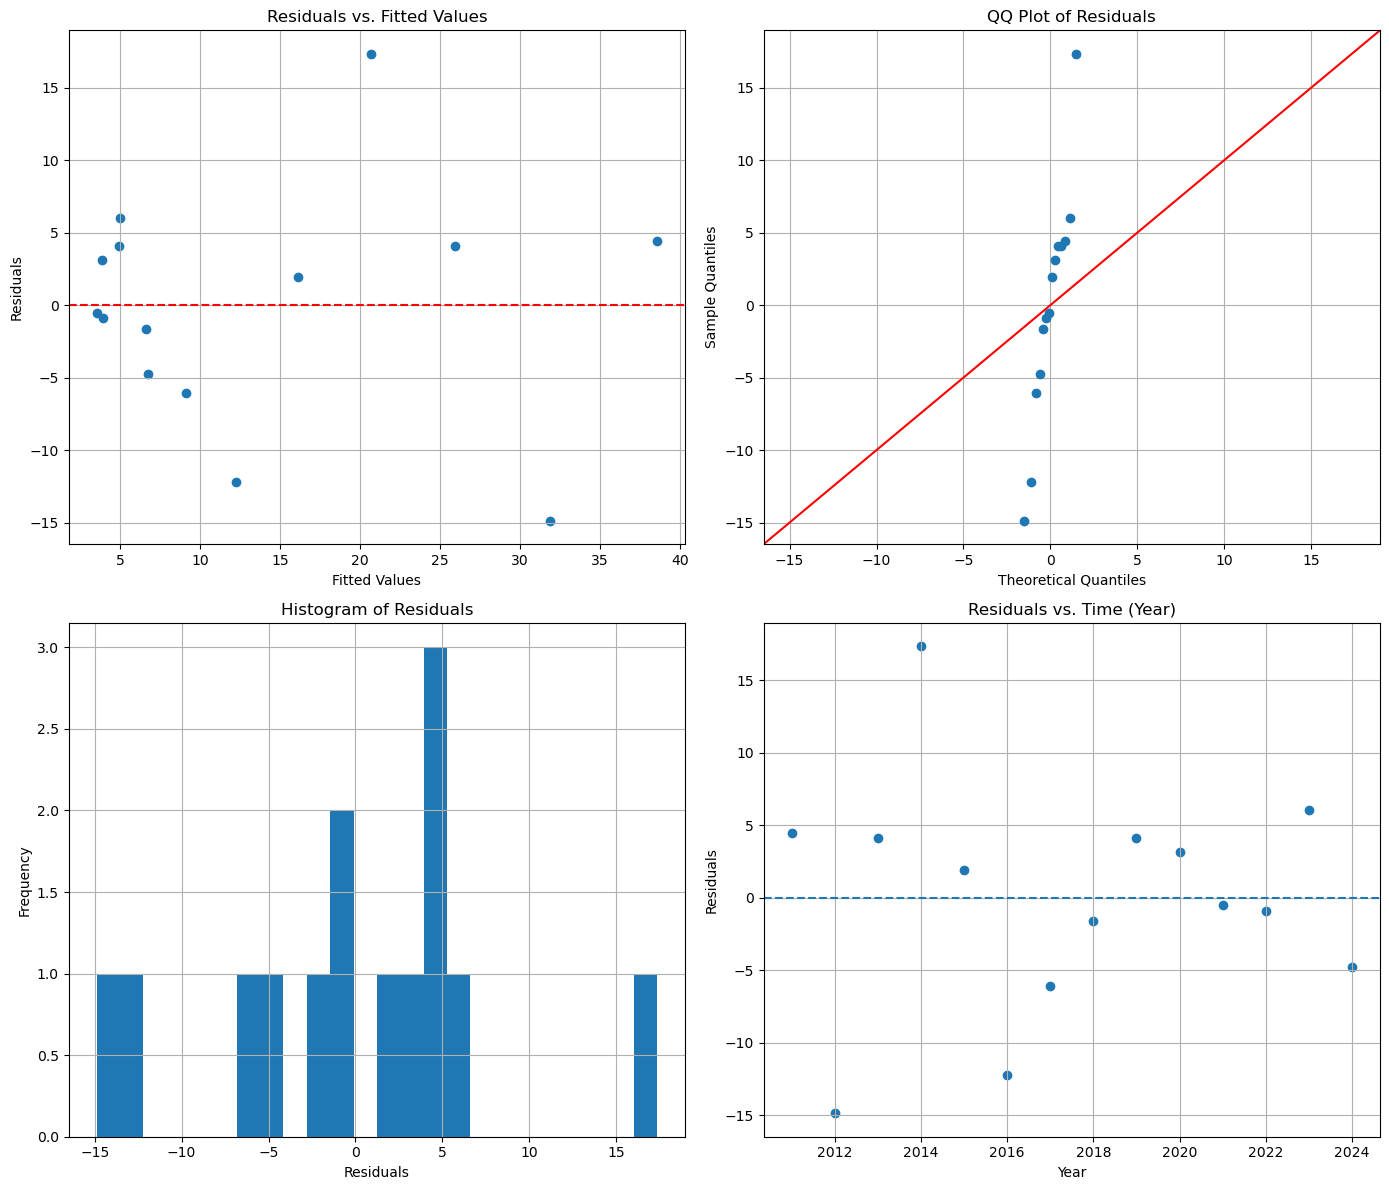

In [23]:
# Calculate the residuals based on the quadratic fit
residuals = infected - poly_func(years)

# Create a 2x2 subplot for the residual plots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Residuals vs. Fitted Values
fitted_values = poly_func(years)
axs[0, 0].scatter(fitted_values, residuals)
axs[0, 0].axhline(y=0, color='red', linestyle='--')
axs[0, 0].set_title('Residuals vs. Fitted Values')
axs[0, 0].set_xlabel('Fitted Values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].grid(True)

# QQ Plot of Residuals
sm.qqplot(residuals, line='45', ax=axs[0, 1])
axs[0, 1].set_title('QQ Plot of Residuals')
axs[0, 1].grid(True)

# Histogram of Residuals
axs[1, 0].hist(residuals, bins=24)
axs[1, 0].set_title('Histogram of Residuals')
axs[1, 0].set_xlabel('Residuals')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

# Residuals vs. Time (Year)
axs[1, 1].scatter(years, residuals)
axs[1, 1].axhline(y=0, linestyle='--')
axs[1, 1].set_title('Residuals vs. Time (Year)')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Residuals')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


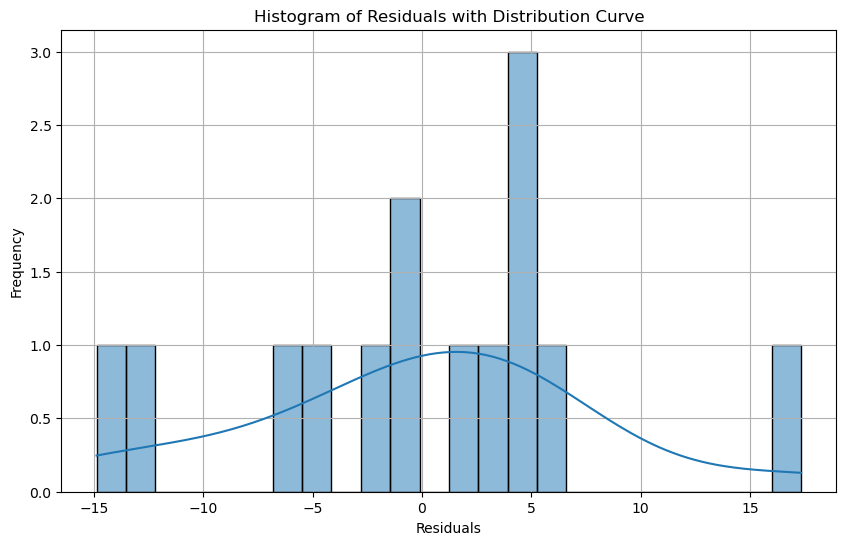

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `residuals` are already calculated
plt.figure(figsize=(10, 6))

# Plot the histogram of residuals
sns.histplot(residuals, kde=True, bins=24)

# Add labels and title
plt.title('Histogram of Residuals with Distribution Curve')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Show the plot
plt.grid(True)
plt.show()

Fitted Mean: -0.00, Fitted Standard Deviation: 8.42


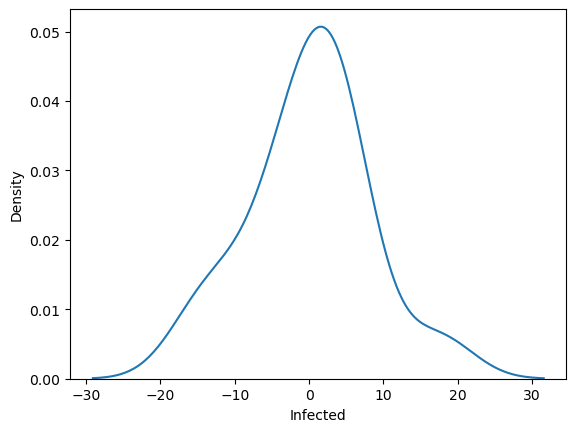

In [25]:
from scipy.stats import norm
from scipy.optimize import curve_fit

# Step 1: Define the normal distribution function
def normal_distribution(x, mean, std_dev):
    return norm.pdf(x, mean, std_dev)

# Step 2: Prepare data for curve fitting
# KDE (Kernel Density Estimation) values from Seaborn
kde = sns.kdeplot(residuals, bw_adjust=1).get_lines()[0].get_data()
x_data, y_data = kde

# Step 3: Initial guess for the parameters [mean, std_dev]
initial_guess = [np.mean(residuals), np.std(residuals)]

# Step 4: Fit the normal distribution to the KDE curve
params, _ = curve_fit(normal_distribution, x_data, y_data, p0=initial_guess)

# Extracting the optimized mean and standard deviation
fitted_mean, fitted_std_dev = params
print(f"Fitted Mean: {fitted_mean:.2f}, Fitted Standard Deviation: {fitted_std_dev:.2f}")

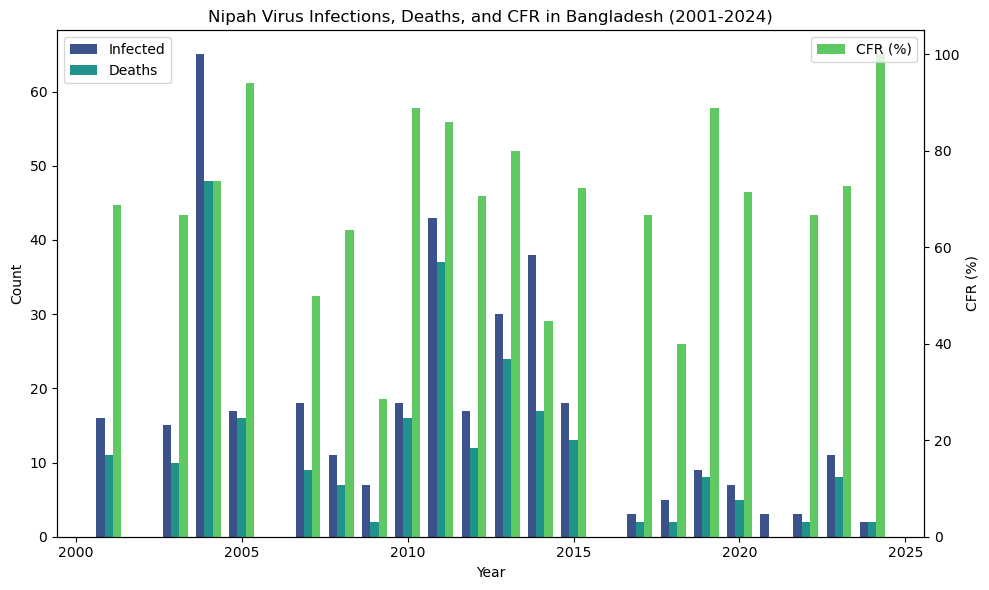

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the updated dataset
nipah_data_updated = pd.read_csv('data/NiV_Data.csv')

# Calculate the Case Fatality Rate (CFR) in percentage
nipah_data_updated['CFR (%)'] = (nipah_data_updated['Death'] / nipah_data_updated['Infected']) * 100

# Set the seaborn style and viridis color palette
# sns.set_theme(style="whitegrid")

# Create a figure and axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define the width of the bars and the x-axis variable
width = 0.25
x = nipah_data_updated['Year']

# Define the color palette
colors = sns.color_palette('viridis', 3)

# Plot Infected and Death counts on the primary y-axis
ax1.bar(x - width, nipah_data_updated['Infected'], width=width, label='Infected', color=colors[0])
ax1.bar(x, nipah_data_updated['Death'], width=width, label='Deaths', color=colors[1])

# Set labels for the primary y-axis
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.set_title('Nipah Virus Infections, Deaths, and CFR in Bangladesh (2001-2024)')

# Create a secondary y-axis for CFR
ax2 = ax1.twinx()

# Plot CFR as a bar plot on the secondary y-axis
ax2.bar(x + width, nipah_data_updated['CFR (%)'], width=width, label='CFR (%)', color=colors[2])

# Set labels for the secondary y-axis
ax2.set_ylabel('CFR (%)')

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.grid(False)
ax2.grid(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('images/nipah_infections_deaths_cfr.png', dpi=220)
plt.show()

# Map of Bangladesh

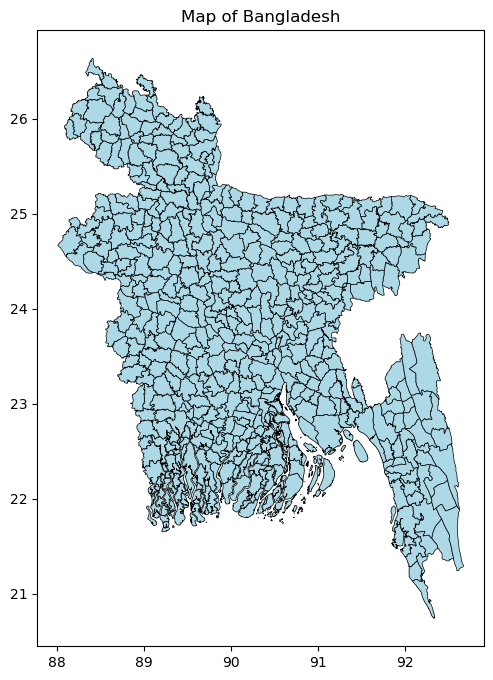

In [27]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the district-level shapefile of Bangladesh
bangladesh = gpd.read_file('data/bangladesh.geojson')

fig, ax = plt.subplots(figsize=(10, 8))
bangladesh.plot(ax=ax, color="lightblue", edgecolor="black", linewidth=0.5)
ax.set_title("Map of Bangladesh")
ax.grid(False)

# Show the map
plt.show()

Number of lattitudes: 32
Number of longitudes: 32
Number of infection data points: 32


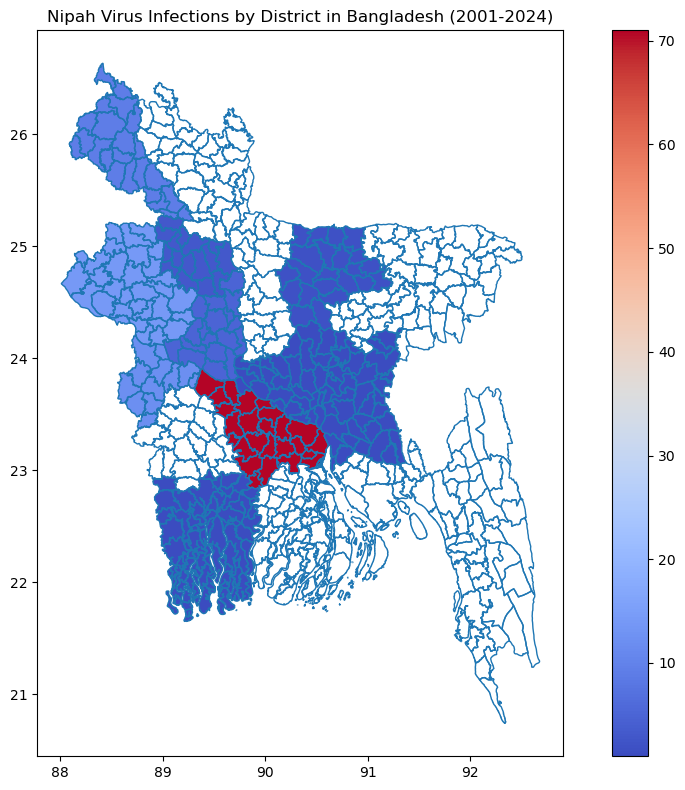

In [63]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the district-level shapefile of Bangladesh
bangladesh = gpd.read_file('data/bangladesh.geojson')

# Extract district names from the GeoDataFrame
districts = bangladesh['NAME_2'].unique()

# Nipah Virus infection data by district (as an example)
data = {
    'District': ['Panchagarh', 'Thakurgaon', 'Nilphamari', 'Dinajpur', 'Lalmonirhat', 'Kurigram', 'Rangpur', 'Gaibandha', 'Joypurhat',
                 'Naogaon', 'Rajshahi', 'Bogra', 'Natore', 'Mymensingh', 'Tangail', 'Meherpur', 'Kushtia', 
                 'Pabna', 'Manikganj', 'Dhaka', 'Chuadanga', 'Jhenaidah', 'Magura', 'Faridpur', 'Narsingdi', 'Comilla', 'Narail',
                 'Gopalganj', 'Madaripur', 'Shariatpur', 'Khulna', 'Jhalokati'],
    'Infected': [1, 12, 6, 9, 24, 3, 16, 1, 10, 29, 14, 3, 9, 2, 12, 13, 12, 5, 17, 1, 1, 2, 6, 71, 1, 1, 1, 8, 6, 3, 1, 1],
    'Latitude': [26.3333, 26.0333, 25.9310, 25.6270, 25.9923, 25.8054, 25.7439, 25.3288, 24.8254, 24.8042, 24.3745, 24.8466, 24.4206, 24.7471, 24.2513, 23.7627, 23.9013, 
                 24.0065, 23.8617, 23.8103, 23.6405, 23.5440, 23.4895, 23.6070, 23.9322, 23.4607, 23.0416, 23.0056, 23.1711, 23.2167, 22.8456, 22.6406],
    'Longitude': [88.5333, 88.4833, 88.8500, 88.6420, 89.2840, 89.6540, 89.2752, 89.5413, 89.0093, 88.9304, 88.6042, 89.3773, 88.9262, 90.4125, 89.9208, 88.6312, 89.1204, 
                  89.2372, 89.9773, 90.4125, 88.8415, 89.1833, 89.4197, 89.8313, 90.7177, 91.1809, 89.4986, 89.8266, 90.1897, 90.3500, 89.5403, 90.2086]
}

print("Number of lattitudes:", len(data.get('Latitude')))
print("Number of longitudes:", len(data.get('Longitude')))
print("Number of infection data points:", len(data['Infected']))
# Convert the infection data into a DataFrame
df_infections = pd.DataFrame(data)

# Merge infection data with the GeoDataFrame (assuming the district names match)
bangladesh = bangladesh.merge(df_infections, how='left', left_on='NAME_2', right_on='District')

# Plotting the map with infection data as a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
bangladesh.boundary.plot(ax=ax, linewidth=1)
bangladesh.plot(column='Infected', ax=ax, cmap='coolwarm', edgecolor='None', linewidth=0.5, legend=True)

# Customize the title and grid
ax.set_title("Nipah Virus Infections by District in Bangladesh (2001-2024)")
ax.grid(False)

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('images/nipah_infections_BD_heatmap.png', dpi=220)

# Show the map
plt.show()